In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('D:\DataSets\heart.csv')

In [3]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()/ len(df)*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [6]:
df.shape

(918, 12)

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
df.groupby('HeartDisease').Sex.value_counts()

HeartDisease  Sex
0             M      267
              F      143
1             M      458
              F       50
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

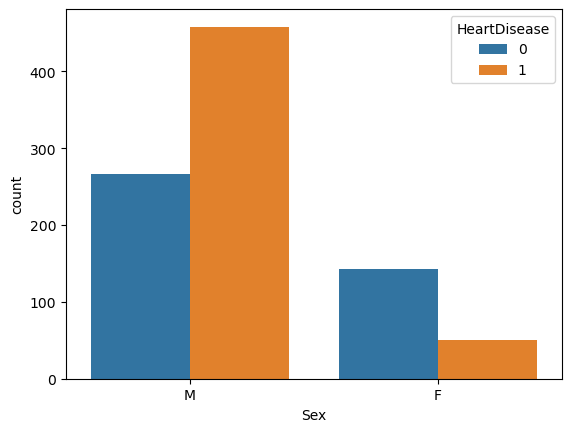

In [10]:
sns.countplot(x='Sex',hue='HeartDisease', data = df)


# Working with Age

In [11]:
age_labels =['26-40','41-55','56-70', '>70']
df['Age']=pd.cut(df.Age,range(10,80,15), right=False, labels=age_labels)

In [12]:
df['Age']=df['Age'].replace(['26-40','41-55','56-70', '>70'],['young_adult','Adults','Middle_Age', 'Older'])

In [13]:
df.groupby((df['HeartDisease']==1)).Age.value_counts()

HeartDisease             
False         Middle_Age     220
              Older          127
              Adults          54
              young_adult      0
True          Older          289
              Middle_Age     171
              Adults          26
              young_adult      0
Name: Age, dtype: int64

In [14]:
df['Age'].value_counts()

Older          416
Middle_Age     391
Adults          80
young_adult      0
Name: Age, dtype: int64

In [15]:
no_of_death = df[df['HeartDisease']==1].value_counts().sum()
print(no_of_death)

486


In [16]:
no_of_Older=df[df['Age'] == 'Older'].value_counts().sum()
no_of_Middle_age=df[df['Age'] == 'Middle_Age'].value_counts().sum()
no_of_Adults=df[df['Age'] == 'Adults'].value_counts().sum()
no_of_Younger=df[df['Age'] == 'young_adult'].value_counts().sum()

In [17]:
print(no_of_Older)
print(no_of_Middle_age)
print(no_of_Adults)
print(no_of_Younger)


416
391
80
0


In [71]:
x=len(df)
print(x)

918


In [20]:
corr_matrix= df.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64